In [1]:
'''
import libraries
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import spacy

In [2]:
# !python3 -m pip install nltk
# !python3 -m nltk.downloader punkt
# !python3 -m nltk.downloader stopwords

# !python3 -m pip install spacy

In [3]:
'''
Load data
'''
data_dir = 'data/input/collection_with_abstracts.csv'
df = pd.read_csv(data_dir)
df.head()

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,Abstract
0,39435445,Editorial: The operationalization of cognitive...,"Winter M, Probst T, Tallon M, Schobel J, Pryss R.",Front Neurosci. 2024 Oct 7;18:1501636. doi: 10...,Winter M,Front Neurosci,2024,2024/10/22,PMC11491427,NaN,10.3389/fnins.2024.1501636,NaN
1,39398866,Characterization of arteriosclerosis based on ...,"Zhou J, Li X, Demeke D, Dinh TA, Yang Y, Janow...",J Med Imaging (Bellingham). 2024 Sep;11(5):057...,Zhou J,J Med Imaging (Bellingham),2024,2024/10/14,PMC11466048,NaN,10.1117/1.JMI.11.5.057501,PURPOSE: Our purpose is to develop a computer ...
2,39390053,Multi-scale input layers and dense decoder agg...,"Lan X, Jin W.",Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,Lan X,Sci Rep,2024,2024/10/10,PMC11467340,NaN,10.1038/s41598-024-74701-0,Accurate segmentation of COVID-19 lesions from...
3,39367648,An initial game-theoretic assessment of enhanc...,"Fatemi MY, Lu Y, Diallo AB, Srinivasan G, Azhe...",Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...,Fatemi MY,Brief Bioinform,2024,2024/10/05,PMC11452536,NaN,10.1093/bib/bbae476,The application of deep learning to spatial tr...
4,39363262,Truncated M13 phage for smart detection of E. ...,"Yuan J, Zhu H, Li S, Thierry B, Yang CT, Zhang...",J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...,Yuan J,J Nanobiotechnology,2024,2024/10/04,PMC11451008,NaN,10.1186/s12951-024-02881-y,BACKGROUND: The urgent need for affordable and...


In [4]:
df

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,Abstract
0,39435445,Editorial: The operationalization of cognitive...,"Winter M, Probst T, Tallon M, Schobel J, Pryss R.",Front Neurosci. 2024 Oct 7;18:1501636. doi: 10...,Winter M,Front Neurosci,2024,2024/10/22,PMC11491427,NaN,10.3389/fnins.2024.1501636,NaN
1,39398866,Characterization of arteriosclerosis based on ...,"Zhou J, Li X, Demeke D, Dinh TA, Yang Y, Janow...",J Med Imaging (Bellingham). 2024 Sep;11(5):057...,Zhou J,J Med Imaging (Bellingham),2024,2024/10/14,PMC11466048,NaN,10.1117/1.JMI.11.5.057501,PURPOSE: Our purpose is to develop a computer ...
2,39390053,Multi-scale input layers and dense decoder agg...,"Lan X, Jin W.",Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,Lan X,Sci Rep,2024,2024/10/10,PMC11467340,NaN,10.1038/s41598-024-74701-0,Accurate segmentation of COVID-19 lesions from...
3,39367648,An initial game-theoretic assessment of enhanc...,"Fatemi MY, Lu Y, Diallo AB, Srinivasan G, Azhe...",Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...,Fatemi MY,Brief Bioinform,2024,2024/10/05,PMC11452536,NaN,10.1093/bib/bbae476,The application of deep learning to spatial tr...
4,39363262,Truncated M13 phage for smart detection of E. ...,"Yuan J, Zhu H, Li S, Thierry B, Yang CT, Zhang...",J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...,Yuan J,J Nanobiotechnology,2024,2024/10/04,PMC11451008,NaN,10.1186/s12951-024-02881-y,BACKGROUND: The urgent need for affordable and...
...,...,...,...,...,...,...,...,...,...,...,...,...
11445,10607521,The characteristics of epidemics and invasions...,"Cruickshank I, Gurney WS, Veitch AR.",Theor Popul Biol. 1999 Dec;56(3):279-92. doi: ...,Cruickshank I,Theor Popul Biol,1999,1999/12/23,NaN,NaN,10.1006/tpbi.1999.1432,In this paper we report the development of a h...
11446,10072741,Effects of sales promotion on smoking among U....,Redmond WH.,Prev Med. 1999 Mar;28(3):243-50. doi: 10.1006/...,Redmond WH,Prev Med,1999,1999/03/12,NaN,NaN,10.1006/pmed.1998.0410,OBJECTIVE: The purpose of this study was to ex...
11447,9200018,Hypertension in an inner-city minority population,Wieck KL.,J Cardiovasc Nurs. 1997 Jul;11(4):41-9. doi: 1...,Wieck KL,J Cardiovasc Nurs,1997,1997/07/01,NaN,NaN,10.1097/00005082-199707000-00005,This study describes an inner-city elderly min...
11448,8039948,Aerosol transmission of a viable virus affecti...,"Grant RH, Scheidt AB, Rueff LR.",Int J Biometeorol. 1994 May;38(1):33-9. doi: 1...,Grant RH,Int J Biometeorol,1994,1994/05/01,NaN,NaN,10.1007/BF01241802,A Gaussian diffusion model was applied to an e...


In [5]:
'''
Check for missing values
'''
df['Abstract'].isna().sum()

np.int64(213)

In [6]:
'''
check for duplicates
'''
df['DOI'].nunique() 

10969

In [7]:
'''
missing values in Abstract column
'''

nrow = df.shape[0]
nnullAb = df.Abstract.isna().sum()
(nnullAb/nrow ) * 100

np.float64(1.8602620087336246)

approx 1.86% of the data is missing in the Abstract column

In [9]:
# Drop rows where 'Abstract' column has missing values
print(f'df before removal::{df.shape}')
df_cleaned = df.dropna(subset=['Abstract'])
print(f'df after removal::{df_cleaned.shape}')
print(f'# rows removed = {df.shape[0] - df_cleaned.shape[0]}')

df before removal::(11450, 12)
df after removal::(11237, 12)
# rows removed = 213


In [7]:

# df[['DOI', 'Abstract']].isnull().sum()
# df_abs_nnan = df[df['Abstract'].isnull()]
# df_abs_nnan[['DOI', 'Abstract']].isna().sum()
# !python3 -m spacy download en_core_web_sm

# !python3 -m pip install --upgrade pip


In [10]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    if pd.isna(text):  # Handle NaN values
        return ""  # Return an empty string for NaN entries
    
    # Process the text using spaCy
    doc = nlp(text.lower())  # Convert to lowercase and process
    tokens = [token.text for token in doc if token.is_alpha]  # Keep only alphabetic tokens
    return ' '.join(tokens)

df_cleaned['clean_Abstract'] = df_cleaned['Abstract'].apply(preprocess_text)

/var/folders/mw/z0lcvm_j57l5gjx8mshnsnkm0000gn/T/ipykernel_14298/3725400477.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['clean_Abstract'] = df_cleaned['Abstract'].apply(preprocess_text)


In [11]:
df_cleaned['clean_Abstract']

1        purpose our purpose is to develop a computer v...
2        accurate segmentation of lesions from medical ...
3        the application of deep learning to spatial tr...
4        background the urgent need for affordable and ...
5        background incidental extrapulmonary findings ...
                               ...                        
11445    in this paper we report the development of a h...
11446    objective the purpose of this study was to exa...
11447    this study describes an inner city elderly min...
11448    a gaussian diffusion model was applied to an e...
11449    the ability of thymidine and four dideoxyribos...
Name: clean_Abstract, Length: 11237, dtype: object

In [12]:

# Define keywords for filtering
'''keywords = [
    'deep learning', 'deep neural networks', 'neural network', 'artificial neural network', 
    'machine learning model', 'feedforward neural network', 'neural net algorithm', 
    'multilayer perceptron', 'convolutional neural network', 'cnn', 
    'recurrent neural network', 'rnn', 'long short-term memory network', 
    'lstm', 'transformer', 'transformer models', 'self-attention models', 
    'attention-based neural networks'
    ]'''

keywords = [
    # Deep Learning Specific
    'deep learning', 'deep neural networks', 'neural network', 'artificial neural network', 
    'machine learning model', 'feedforward neural network', 'neural net algorithm', 
    'multilayer perceptron', 'convolutional neural network', 'cnn', 
    'recurrent neural network', 'rnn', 'long short-term memory network', 
    'lstm', 'transformer', 'transformer models', 'self-attention models', 
    'attention-based neural networks',
    
    # Computer Vision
    'computer vision', 'vision model', 'image processing', 
    'vision algorithms', 'object recognition', 'scene understanding',

    # Natural Language Processing
    'natural language processing', 'text mining', 'NLP', 
    'computational linguistics', 'language processing', 
    'text analytics', 'textual data analysis', 'text data analysis', 
    'text analysis', 'speech and language technology', 
    'language modeling', 'computational semantics',

    # Generative AI
    'generative artificial intelligence', 'generative AI', 
    'generative deep learning', 'generative models',

    # Large Language Models
    'large language model', 'transformer-based model', 
    'pretrained language model', 'generative language model', 
    'foundation model', 'state-of-the-art language model',

    # Multimodal Models
    'multimodal model', 'multimodal neural network', 
    'vision transformer', 'diffusion model', 
    'generative diffusion model', 'diffusion-based generative model', 
    'continuous diffusion model'
]


def filter_papers(text):
    return any(keyword in text for keyword in keywords)

In [13]:
# Filter relevant papers
df_cleaned['is_relevant'] = df_cleaned['clean_Abstract'].apply(filter_papers)
relevant_papers = df_cleaned[df_cleaned['is_relevant']]

/var/folders/mw/z0lcvm_j57l5gjx8mshnsnkm0000gn/T/ipykernel_14298/381664074.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['is_relevant'] = df_cleaned['clean_Abstract'].apply(filter_papers)


In [16]:
df_cleaned.is_relevant.value_counts()  

is_relevant
True     7233
False    4004
Name: count, dtype: int64

In [14]:
relevant_papers.head()

,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI,Abstract,clean_Abstract,is_relevant
1,39398866,Characterization of arteriosclerosis based on ...,"Zhou J, Li X, Demeke D, Dinh TA, Yang Y, Janow...",J Med Imaging (Bellingham). 2024 Sep;11(5):057...,Zhou J,J Med Imaging (Bellingham),2024,2024/10/14,PMC11466048,NaN,10.1117/1.JMI.11.5.057501,PURPOSE: Our purpose is to develop a computer ...,purpose our purpose is to develop a computer v...,True
2,39390053,Multi-scale input layers and dense decoder agg...,"Lan X, Jin W.",Sci Rep. 2024 Oct 10;14(1):23729. doi: 10.1038...,Lan X,Sci Rep,2024,2024/10/10,PMC11467340,NaN,10.1038/s41598-024-74701-0,Accurate segmentation of COVID-19 lesions from...,accurate segmentation of lesions from medical ...,True
3,39367648,An initial game-theoretic assessment of enhanc...,"Fatemi MY, Lu Y, Diallo AB, Srinivasan G, Azhe...",Brief Bioinform. 2024 Sep 23;25(6):bbae476. do...,Fatemi MY,Brief Bioinform,2024,2024/10/05,PMC11452536,NaN,10.1093/bib/bbae476,The application of deep learning to spatial tr...,the application of deep learning to spatial tr...,True
4,39363262,Truncated M13 phage for smart detection of E. ...,"Yuan J, Zhu H, Li S, Thierry B, Yang CT, Zhang...",J Nanobiotechnology. 2024 Oct 3;22(1):599. doi...,Yuan J,J Nanobiotechnology,2024,2024/10/04,PMC11451008,NaN,10.1186/s12951-024-02881-y,BACKGROUND: The urgent need for affordable and...,background the urgent need for affordable and ...,True
6,39285189,"CVS-Q teen: an adapted, reliable and validated...","Seguí-Crespo M, Cantó-Sancho N, Sánchez-Brau M...",Sci Rep. 2024 Sep 16;14(1):21576. doi: 10.1038...,Seguí-Crespo M,Sci Rep,2024,2024/09/16,PMC11405871,NaN,10.1038/s41598-024-70821-9,Adolescents' extensive use of digital devices ...,adolescents extensive use of digital devices r...,True


In [17]:
# Classifying methods based on keywords
def classify_method(text):
    if 'text mining' in text:
        return 'text mining'
    elif 'computer vision' in text:
        return 'computer vision'
    elif 'both' in text:
        return 'both'
    else:
        return 'other'

# Apply classification to relevant papers
df_cleaned['method_type'] = df_cleaned['clean_Abstract'].apply(classify_method)


/var/folders/mw/z0lcvm_j57l5gjx8mshnsnkm0000gn/T/ipykernel_14298/3671429212.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['method_type'] = df_cleaned['clean_Abstract'].apply(classify_method)


In [18]:
methods_report = df_cleaned[['Title', 'method_type']].groupby('method_type').size().reset_index(name='count')

methods_report

,method_type,count
0,both,2350
1,computer vision,166
2,other,8378
3,text mining,343


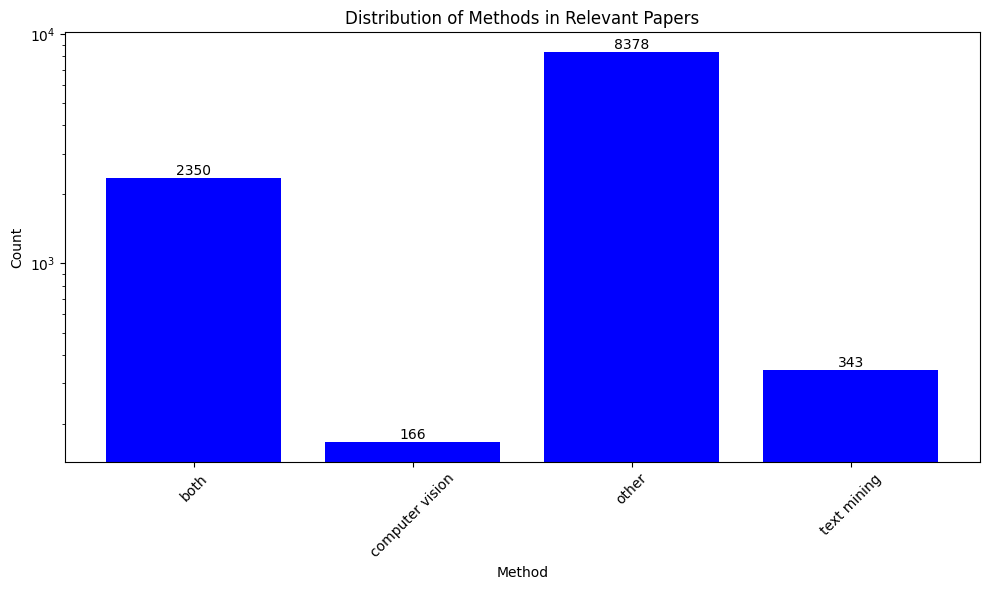

In [20]:
plt.figure(figsize=(10, 6))
bars = plt.bar(methods_report['method_type'], methods_report['count'], color='blue')
plt.xlabel('Method')
plt.ylabel('Count')
plt.title('Distribution of Methods in Relevant Papers')
plt.xticks(rotation=45)
plt.yscale('log')

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()  # Adjust layout for better fit
plt.show()

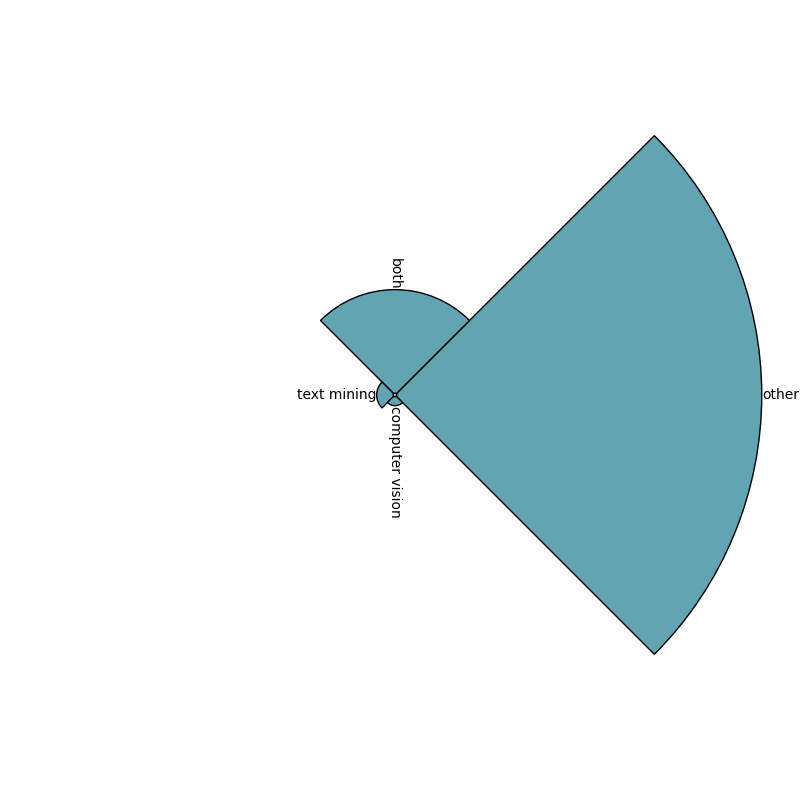

In [29]:
# First, we need to count the occurrences of each method_name
df_counts = df_cleaned['method_type'].value_counts().reset_index()
df_counts.columns = ['Unique_cat', 'counts']
circular_bar(df_counts, 'Unique_cat', 'counts')

In [22]:
# Function to extract method names from the abstract
def extract_methods(abstract):
    # Example patterns to identify methods
    
    method_keywords = [
    # Deep Learning Specific
    'deep learning', 'deep neural networks', 'neural network', 'artificial neural network', 
    'machine learning model', 'feedforward neural network', 'neural net algorithm', 
    'multilayer perceptron', 'convolutional neural network', 'cnn', 
    'recurrent neural network', 'rnn', 'long short-term memory network', 
    'lstm', 'transformer', 'transformer models', 'self-attention models', 
    'attention-based neural networks',
    
    # Computer Vision
    'computer vision', 'vision model', 'image processing', 
    'vision algorithms', 'object recognition', 'scene understanding',

    # Natural Language Processing
    'natural language processing', 'text mining', 'NLP', 
    'computational linguistics', 'language processing', 
    'text analytics', 'textual data analysis', 'text data analysis', 
    'text analysis', 'speech and language technology', 
    'language modeling', 'computational semantics',

    # Generative AI
    'generative artificial intelligence', 'generative AI', 
    'generative deep learning', 'generative models',

    # Large Language Models
    'large language model', 'transformer-based model', 
    'pretrained language model', 'generative language model', 
    'foundation model', 'state-of-the-art language model',

    # Multimodal Models
    'multimodal model', 'multimodal neural network', 
    'vision transformer', 'diffusion model', 
    'generative diffusion model', 'diffusion-based generative model', 
    'continuous diffusion model'
]
    
    # Find all methods mentioned in the abstract
    methods_found = [method for method in method_keywords if method in abstract]
    return ', '.join(methods_found) 

In [23]:
# Apply method extraction
df_cleaned['method_name'] = df_cleaned['clean_Abstract'].apply(extract_methods)

# Create a report containing the title and methods for each relevant paper
method_name_report = df_cleaned[['Title', 'method_name']]
method_name_report

/var/folders/mw/z0lcvm_j57l5gjx8mshnsnkm0000gn/T/ipykernel_14298/926203871.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['method_name'] = df_cleaned['clean_Abstract'].apply(extract_methods)


,Title,method_name
1,Characterization of arteriosclerosis based on ...,"deep learning, computer vision"
2,Multi-scale input layers and dense decoder agg...,deep learning
3,An initial game-theoretic assessment of enhanc...,"deep learning, neural network"
4,Truncated M13 phage for smart detection of E. ...,"neural network, convolutional neural network, ..."
5,AI for Multistructure Incidental Findings and ...,
...,...,...
11445,The characteristics of epidemics and invasions...,diffusion model
11446,Effects of sales promotion on smoking among U....,diffusion model
11447,Hypertension in an inner-city minority population,diffusion model
11448,Aerosol transmission of a viable virus affecti...,diffusion model


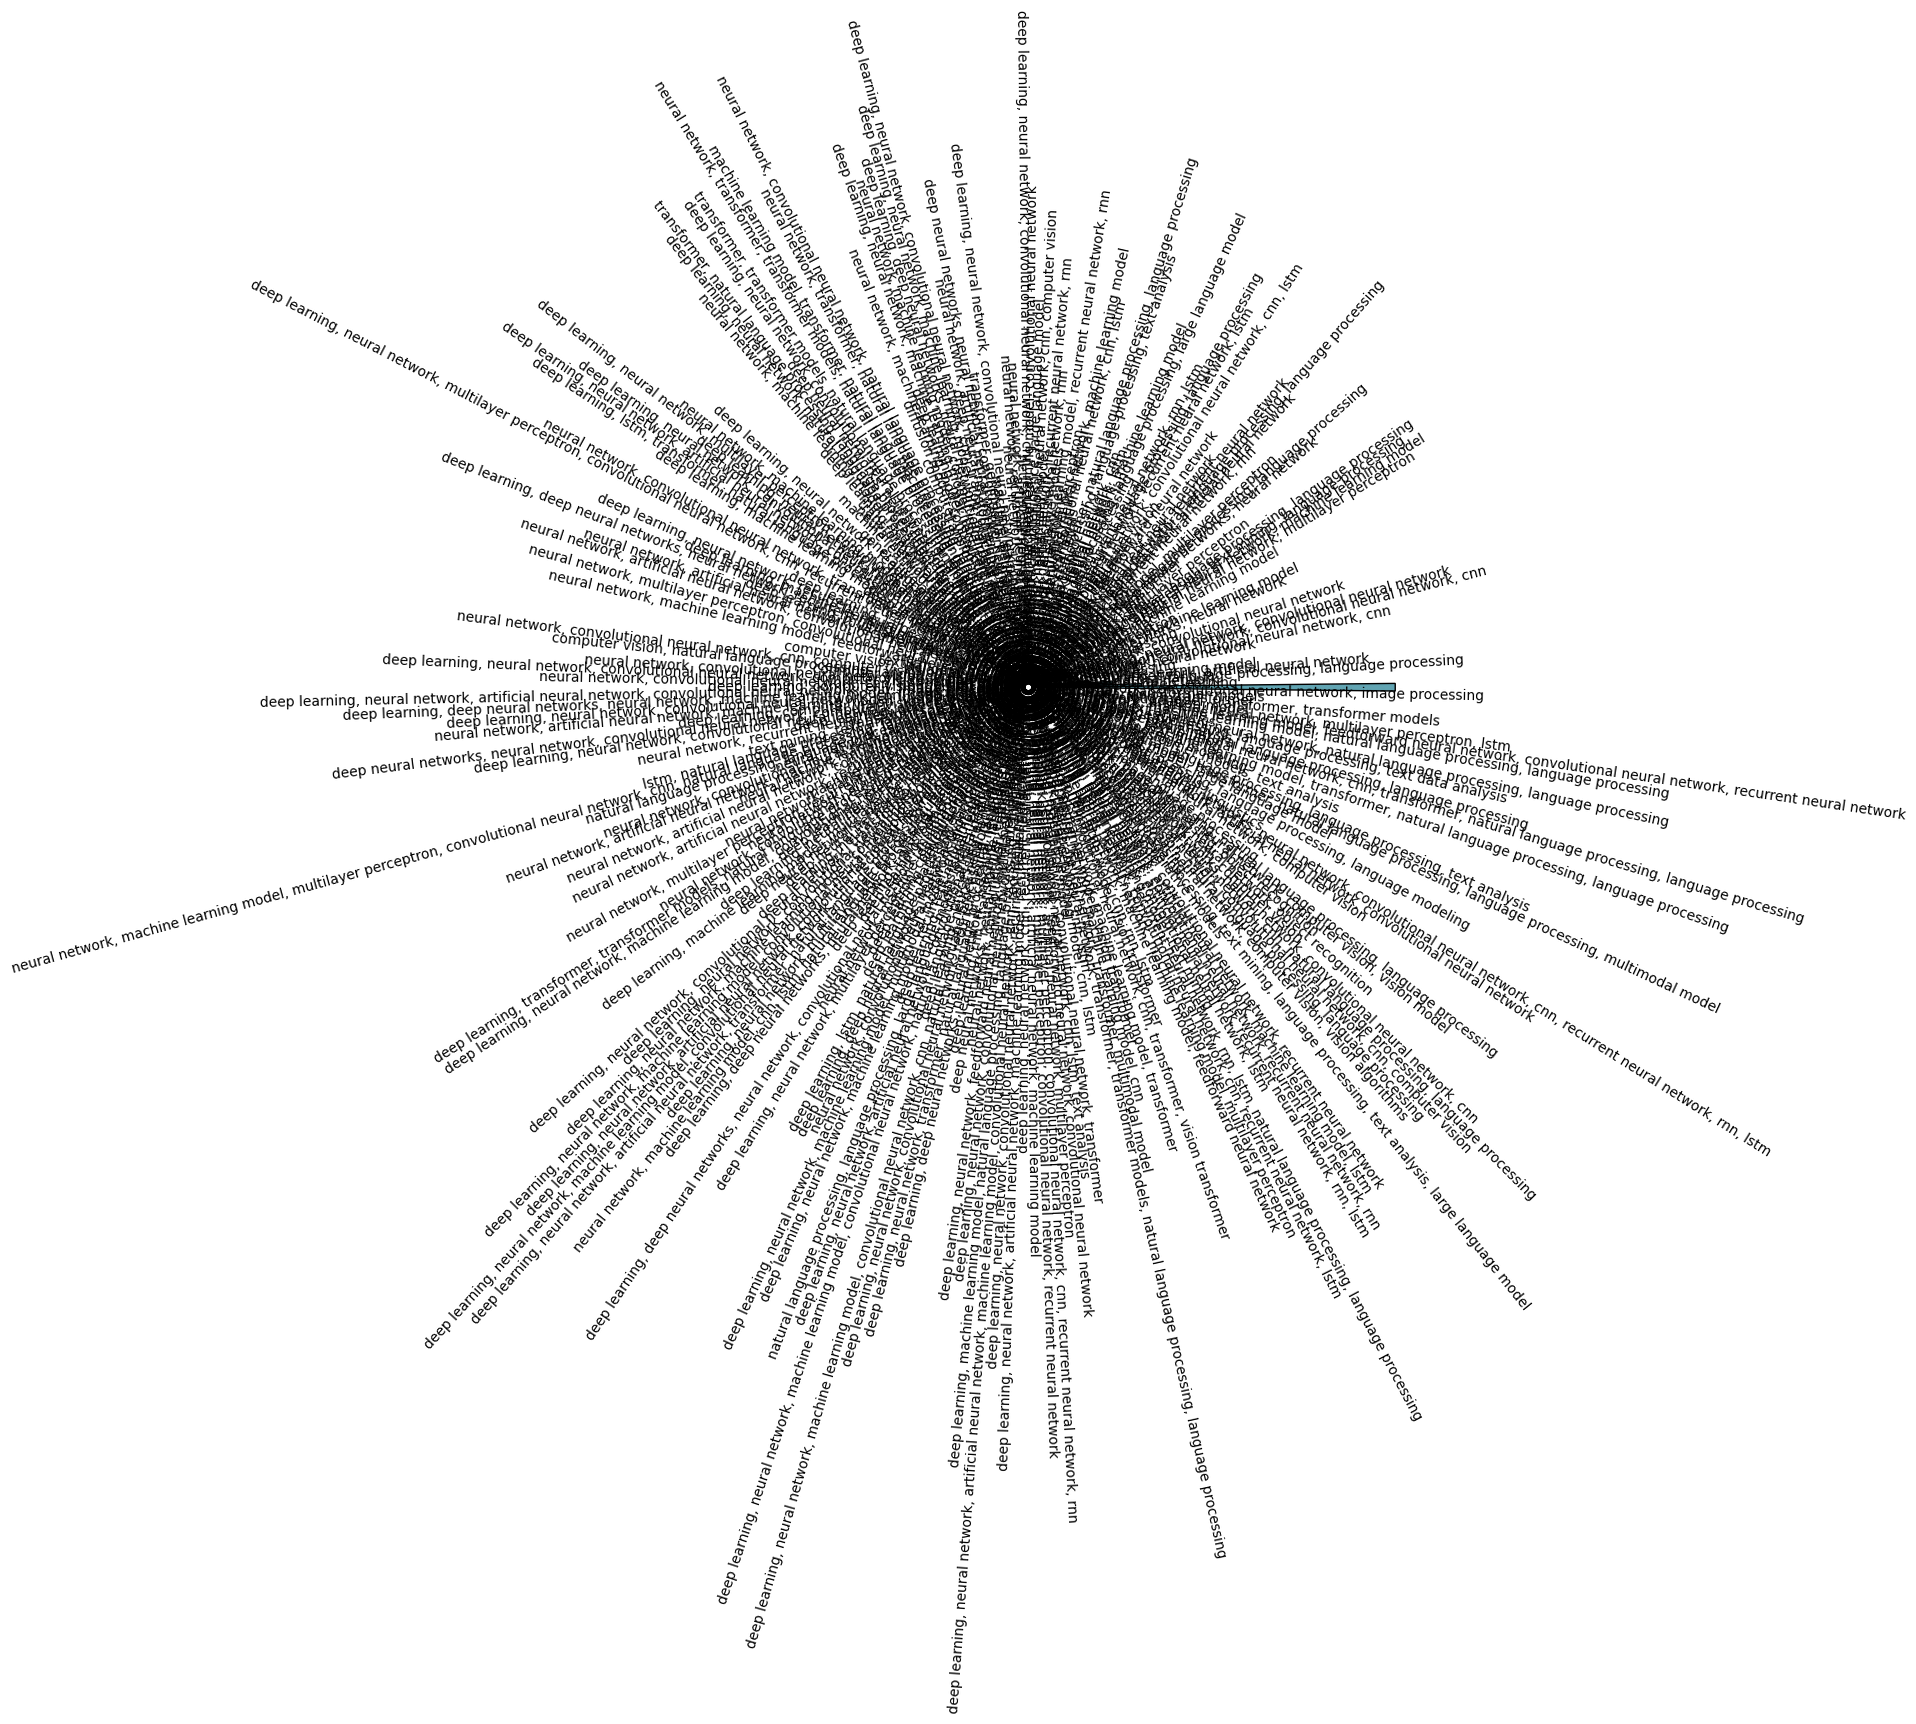

In [28]:
# First, we need to count the occurrences of each method_name
df_counts = df_cleaned['method_name'].value_counts().reset_index()
df_counts.columns = ['Unique_cat', 'counts']

# Plotting function to visualize the categories of the method names
def circular_bar(df, col_name, col_counts):
    # Initialize the figure
    plt.figure(figsize=(15, 10))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')

    # Set the coordinates limits
    upperLimit = 100
    lowerLimit = 40

    maxi = df[col_counts].max()
    slope = 1  # Scaling factor
    heights = slope * df[col_counts] + lowerLimit

    # Compute the width of each bar. Total width = 2*Pi
    width = 2 * np.pi / len(df.index)

    # Compute the angle for each bar
    indexes = list(range(len(df.index)))
    angles = [index * width for index in indexes]

    # Draw bars
    bars = ax.bar(
        x=angles,
        height=heights,
        width=width,
        bottom=lowerLimit,
        linewidth=1,
        edgecolor="black",
        color="#61a4b2"
    )

    # Label padding
    labelPadding = 4

    # Add labels
    for bar, angle, height, label in zip(bars, angles, heights, df[col_name]):
        # Determine rotation for the labels
        rotation = np.rad2deg(angle)

        # Adjust alignment based on angle
        alignment = "left" if angle < np.pi / 2 or angle >= 3 * np.pi / 2 else "right"
        if alignment == "right":
            rotation += 180

        # Finally add the labels
        ax.text(
            x=angle,
            y=lowerLimit + bar.get_height() + labelPadding,
            s=label,
            ha=alignment,
            va='center',
            rotation=rotation,
            rotation_mode="anchor"
        )

    plt.show()

# Applying the function on the extracted category dataset
circular_bar(df_counts, 'Unique_cat', 'counts')


In [ ]:
STOP

In [ ]:
# Extract method names
def extract_method_name(text):
    cnn_keywords = ['convolutional', 'cnn', 'convolutional neural network']
    for keyword in cnn_keywords:
        if keyword in text:
            return 'Convolutional Neural Network'
        elif 'rnn' in text:
            return 'Recurrent Neural Network'
        return 'Unknown Method'

    '''if 'cnn' in text:
        return 'Convolutional Neural Network'
    elif 'rnn' in text:
        return 'Recurrent Neural Network'
    return 'Unknown Method'''

relevant_papers['method_name'] = relevant_papers['processed_text'].apply(extract_method_name)

# Save the relevant papers
relevant_papers.to_csv('./data/output/filtered_relevant_papers.csv', index=False)

print("Filtered relevant papers have been saved to './data/output/filtered_relevant_papers.csv'.")


In [ ]:
relevant_papers['method_name'].value_counts()

In [29]:
#Extracting the categories and the values counts
cat = relevant_papers['method_name'].value_counts(normalize=True, sort=False)*1000
df_counts = cat.rename_axis('Unique_cat').to_frame('counts')
df_counts= df_counts.reset_index()

In [ ]:
#Plotting function visualize the categories of the news articles

def circular_bar(df, col_name, col_counts):
    # initialize the figure
    plt.figure(figsize=(15,20))
    ax = plt.subplot(111, polar=True)
    plt.axis('off')


    # Set the coordinates limits
    upperLimit = 100
    lowerLimit = 40

    maxi = df[col_counts].max()
    slope = 1 # (maxi - lowerLimit) / maxi
    heights = slope * df[col_counts] + lowerLimit

    # Compute the width of each bar. In total we have 2*Pi = 360°
    width = 2*np.pi / len(df.index)

    # Compute the angle each bar is centered on:
    indexes = list(range(1, len(df.index)+1))
    angles = [element * width for element in indexes]
    angles
    # Draw bars
    bars = ax.bar(
        x=angles, 
        height=heights, 
        width=width, 
        bottom=lowerLimit,
        linewidth=1, 
        edgecolor="black",
        color="#61a4b2",
    )

    # little space between the bar and the label
    labelPadding = 4

    # Add labels
    for bar, angle, height, label in zip(bars,angles, heights, df[col_name]):

    # Labels are rotated. Rotation must be specified in degrees :(
        rotation = np.rad2deg(angle)

    # Flip some labels upside down
        alignment = ""
        if angle >= np.pi/2 and angle < 3*np.pi/2:
            alignment = "right"
            rotation = rotation + 180
        else: 
            alignment = "left"

    # Finally add the labels
        ax.text(
            x=angle, 
            y=lowerLimit + bar.get_height() + labelPadding, 
            s=label, 
            ha=alignment, 
            va='center', 
            rotation=rotation, 
            rotation_mode="anchor") 
    plt.show()


#Applying the function on the extracted category dataset
circular_bar(df_counts, 'Unique_cat', 'counts')

In [ ]:
relevant_papers['label'] = relevant_papers['is_relevant'].astype(int)

In [ ]:
relevant_papers['label'].value_counts()